# Iris Flower Classification Using Naive Bayes Classifier

In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [17]:
irisdata=datasets.load_iris()
print(irisdata.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
x=irisdata.data
y=irisdata.target
df_x=pd.DataFrame(data=x,columns=irisdata.feature_names)
df_x.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
128,6.4,2.8,5.6,2.1
7,5.0,3.4,1.5,0.2
145,6.7,3.0,5.2,2.3
56,6.3,3.3,4.7,1.6
5,5.4,3.9,1.7,0.4


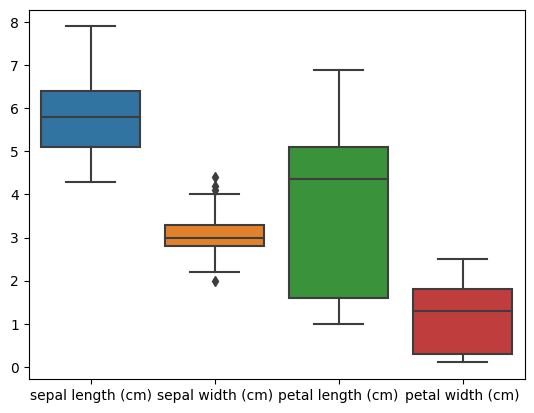

In [19]:
sns.boxplot(data=df_x.iloc[:, :4])
plt.show()

In [20]:
x_scaler=StandardScaler().fit_transform(df_x)
x_scaler=pd.DataFrame(x_scaler)
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=42)
classifier=GaussianNB()
classifier.fit(x_train,y_train)
pred_y=classifier.predict(x_test)

In [21]:
(y_test,pred_y)

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
        0]),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
        0]))

In [22]:
accuracy_score(y_test,pred_y)

0.9777777777777777

In [24]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
import random
import statistics

while True:
  centroid=[]
  for i in range(k):
    val=random.randint(0,n)
    centroid.append((x_scaler.iloc[val,0],x_scaler.iloc[val,1]))
  DistMat=[]
  for i in centroid :
    temp=[]
    for j in range(0,n):
      temp.append(Edistance(x_scaler.iloc[j,0],i[0],x_scaler.iloc[j,1],i[1]))
    DistMat.append(temp)

  dist=pd.DataFrame(DistMat)
  MinIndex=[]
  for i in range(0,n):
    MinIndex.append(np.array(dist.iloc[:,i]).argmin())

  df=pd.DataFrame(MinIndex)
  x_scaler['cluster']=df
  new_centroids=[]
  for i in range(len(centroid)):
    x=[]
    y=[]
    for j in range(0,n):
      if x_scaler.iloc[j,2]==i:
        x.append(x_scaler.iloc[j,0])
        y.append(x_scaler.iloc[j,1])
    x_mean=statistics.mean(x)
    y_mean=statistics.mean(y)
    new_centroids.append((x_mean,y_mean))

  threshold=[]
  for i in range(k):
    x=centroid[i]
    y=new_centroids[i]
    threshold.append(Edistance(x[0],y[0],x[1],y[1]))
  
  flag=True
  for i in threshold:
    if i>0.1:
      flag=False
      break
  if flag == True:
    break